In [26]:
from agents import ExchangeAgent, NoiseAgent, MarketMaker, ProbeTrader
from simulator import Simulator

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
spread_initial = {'bid': 500, 'ask': 600}

# Initialize Exchange Agent
exchange = ExchangeAgent(spread_initial, depth=2000, price_std=50, quantity_mean=1, quantity_std=1)

# Initialize Traders
noise_agents = [NoiseAgent(exchange) for i in range(100)]
market_makers = [MarketMaker(exchange, 45, 100, 10) for j in range(2)]
probe_trader = ProbeTrader(exchange, 'ask', quantity_mean=6)

# Simulation
simulator = Simulator(exchange, noise_agents=noise_agents, market_makers=market_makers,
                      probe_trader=None)

Market Initialization: 100%|█████████████████████████████████████████████████████| 1999/1999 [00:00<00:00, 2904.76it/s]


In [54]:
orders = pd.DataFrame(simulator.market.order_book['bid'].to_list()).drop('trader_link', axis=1)
orders = orders.append(pd.DataFrame(simulator.market.order_book['ask'].to_list()).drop('trader_link', axis=1))
orders.head()

,price,qty,order_type
0,500.000000,1.000000,bid
1,499.987666,0.255721,bid
2,499.977968,0.247947,bid
3,499.932894,0.480520,bid
4,499.929947,0.946736,bid


In [55]:
orders[orders['order_type'] == 'bid'].describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
price,2000.0,450.1,48.8,54.9,428.7,464.2,486.2,500.0
qty,2000.0,1.0,1.1,0.1,0.4,0.7,1.2,23.1


In [56]:
orders[orders['order_type'] == 'ask'].describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
price,2000.0,649.9,48.8,600.0,613.8,635.8,671.3,1045.1
qty,2000.0,1.0,1.1,0.1,0.4,0.7,1.2,23.1


<AxesSubplot:xlabel='price', ylabel='Count'>

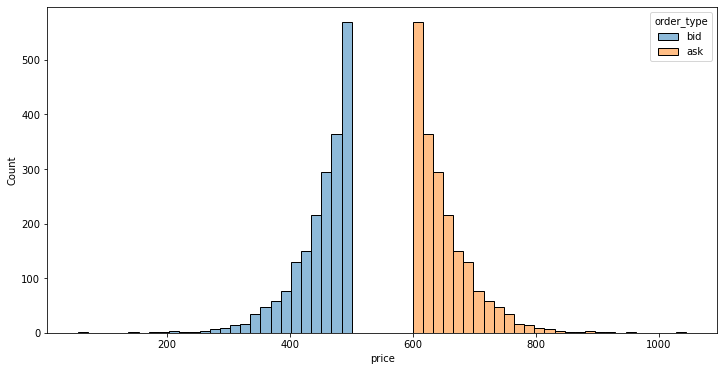

In [57]:
plt.figure(figsize=(12, 6))
sns.histplot(data=orders, x='price', hue='order_type', bins=60)